In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os
from collections import Counter


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [2]:
df = pd.read_csv(r"D:\FData\LaLiga_2024_25\till_gw13.csv")

In [106]:
df = pd.read_csv(r"D:\FData\EPL_2024_25\till_gw11.csv")

In [12]:
df = pd.read_csv(r"D:\FData\LaLiga_2024_25\CSV_FIles\EventData\GW2\Barcelona_vs_Athletic Club_EventsData.csv")

# Stats

In [107]:
def count_one_twos(pname):
    df_team = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)]
    df_ot = df[(df['type'].shift(1)=='Pass') & (df['name'].shift(1)==pname) & (df['outcomeType'].shift(1)=='Successful') &
               (df['type']=='Pass') & (df['outcomeType']=='Successful') & (df['name'].shift(-1)==pname) & (df['x']<df['endX']) &
               (df['x'].shift(1)<df['endX']) & (df['endX']>=52.5)]

    ot_stats = df_ot['name'].value_counts().reset_index()
    ot_stats = ot_stats.sort_values(by='count', ascending=False)
    if len(ot_stats) != 0:
        most_with = ot_stats['name'][0]
    else:
        most_with = 'None'
    return {
        'Name' : pname,
        'Total_One_Twos': ot_stats['count'].sum(),
        'Most_with': most_with
    }

In [ ]:
pnames = df['name'].unique()

# Create a list of dictionaries to store the counts for each player
data = []

for pname in pnames:
    counts = count_one_twos(pname)
    data.append(counts)

# Convert the list of dictionaries to a DataFrame
one_twos_stats_df = pd.DataFrame(data)

# Sort the DataFrame by 'pr_count' in descending order
one_twos_stats_df = one_twos_stats_df.sort_values(by='Total_One_Twos', ascending=False).reset_index(drop=True)
one_twos_stats_df

In [38]:
def one_twos_counter(pname):
    team_name = df[df['name']==pname]['teamName'].max()
    df_team = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)].reset_index(drop=True)
    partner_list = []
    ot_count = 0
    for i in range(len(df_team)):
        if (df_team.loc[i, 'type'] == 'Pass' and df_team.loc[i, 'name'] == pname and df_team.loc[i, 'outcomeType'] == 'Successful' and
            df_team.loc[i+1, 'type'] == 'Pass' and df_team.loc[i+1, 'outcomeType'] == 'Successful' and df_team.loc[i+2, 'name'] == pname and
            ((np.sqrt((df_team.loc[i+1, 'endX']-105)**2+(df_team.loc[i+1, 'endY']-34)**2)) <= (np.sqrt((df_team.loc[i, 'x']-105)**2+(df_team.loc[i, 'y']-34)**2))*0.85) and
            (df_team.loc[i+1, 'cumulative_mins'] - df_team.loc[i, 'cumulative_mins'] <= 0.0667)
           ):
            partner_list.append(df.loc[i+1, 'shortName'])
            ot_count += 1 

    # counter = Counter(partner_list)
    # top_p = counter.most_common(1)
    # ax.text(34, 113, f'{pname}', fontsize=30, fontweight='bold', ha='center', va='center')
    # for sh_name, count in top_p:
    #     most_with = sh_name
    #     ot_closed = count

    return {
        'Name': pname,
        'One_Twos_Opened': ot_count
    }

In [39]:
pnames = df['name'].unique()

# Create a list of dictionaries to store the counts for each player
data = []

for pname in pnames:
    counts = one_twos_counter(pname)
    data.append(counts)

# Convert the list of dictionaries to a DataFrame
one_twos_stats_df = pd.DataFrame(data)

# Sort the DataFrame by 'pr_count' in descending order
one_twos_stats_df = one_twos_stats_df.sort_values(by='One_Twos_Opened', ascending=False).reset_index(drop=True)
one_twos_stats_df

,Name,One_Twos_Opened
0,Jesus Areso,20
1,Oscar Mingueza,19
2,Thierry Correia,13
3,Lucas Rosa,11
4,Raphinha,10
5,Abde Ezzalzouli,9
6,Pedri,9
7,Alejandro Balde,8
8,Raul Moro,8
9,Kylian Mbappe,8


# Viz

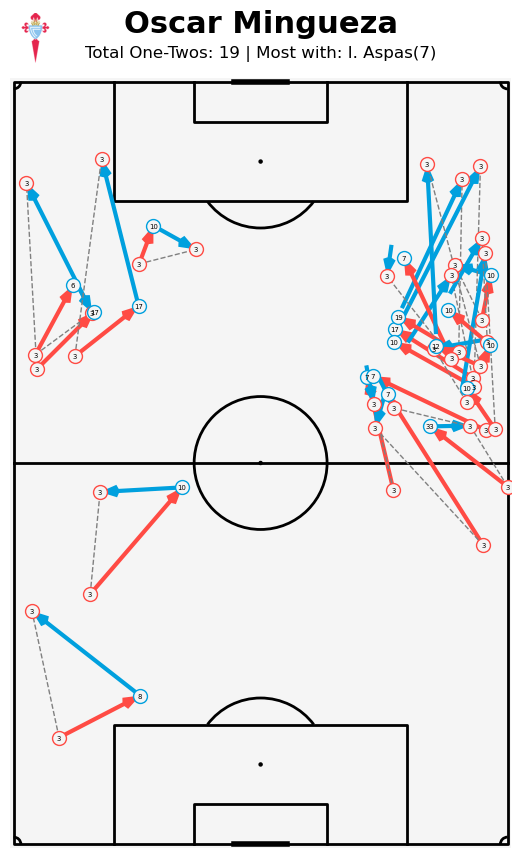

In [40]:
def plot_one_twos(ax, pname):
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 68.5)
    ax.set_ylim(-0.5, 105.5)
    ax.invert_xaxis()
    partner_list = []
    ot_count = 0
    for i in range(len(df)):
        if (df.loc[i, 'type'] == 'Pass' and df.loc[i, 'name'] == pname and df.loc[i, 'outcomeType'] == 'Successful' and
            df.loc[i+1, 'type'] == 'Pass' and df.loc[i+1, 'outcomeType'] == 'Successful' and df.loc[i+2, 'name'] == pname and
            ((np.sqrt((df.loc[i+1, 'endX']-105)**2+(df.loc[i+1, 'endY']-34)**2)) <= (np.sqrt((df.loc[i, 'x']-105)**2+(df.loc[i, 'y']-34)**2))*0.85) and
            (df.loc[i+1, 'cumulative_mins'] - df.loc[i, 'cumulative_mins'] <= 0.0667)
           ):
            ax.scatter(df.loc[i, 'y'], df.loc[i, 'x'], color=bg_color, edgecolor=col1, s=100, zorder=4)
            ax.scatter(df.loc[i, 'endY'], df.loc[i, 'endX'], color=bg_color, edgecolor=col2, s=100, zorder=4)
            ax.scatter(df.loc[i+1, 'endY'], df.loc[i+1, 'endX'], color=bg_color, edgecolor=col1, s=100, zorder=4)
            pitch.arrows(df.loc[i, 'x'], df.loc[i, 'y'], df.loc[i, 'endX'], df.loc[i, 'endY'], headwidth=3, headlength=4, width=3, color=col1, zorder=1, ax=ax)
            pitch.arrows(df.loc[i+1, 'x'], df.loc[i+1, 'y'], df.loc[i+1, 'endX'], df.loc[i+1, 'endY'], headwidth=3, headlength=4, width=3, color=col2, zorder=1, ax=ax)
            pitch.lines(df.loc[i, 'x'], df.loc[i, 'y'], df.loc[i+1, 'endX'], df.loc[i+1, 'endY'], linestyle='--', lw=1, color='gray', zorder=1, ax=ax)
            ax.text(df.loc[i, 'y'], df.loc[i, 'x'], f"{int(df.loc[i, 'shirtNo'])}", fontsize=5, ha='center', va='center', zorder=5)
            ax.text(df.loc[i, 'endY'], df.loc[i, 'endX'], f"{int(df.loc[i+1, 'shirtNo'])}", fontsize=5, ha='center', va='center', zorder=5)
            ax.text(df.loc[i+1, 'endY'], df.loc[i+1, 'endX'], f"{int(df.loc[i, 'shirtNo'])}", fontsize=5, ha='center', va='center', zorder=5)
            # break
            partner_list.append(df.loc[i+1, 'shortName'])
            ot_count += 1 

    counter = Counter(partner_list)
    top_p = counter.most_common(1)
    ax.text(34, 113, f'{pname}', fontsize=22, fontweight='bold', ha='center', va='center')
    for sh_name, count in top_p:
        ax.text(34, 109, f'Total One-Twos: {ot_count} | Most with: {sh_name}({count})', fontsize=12, ha='center', va='center')

    team_name = df[df['name']==pname]['teamName'].max()
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(111, 65, image, height=7, ax=ax)

fig,ax=plt.subplots(figsize=(10,10))
plot_one_twos(ax, 'Oscar Mingueza')